<a href="https://colab.research.google.com/github/IanQS/neuromatch_project/blob/main/ibl_brain_region_spike_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source

[IBL: Loading Spike Sorting Dataset](https://int-brain-lab.github.io/iblenv/notebooks_external/loading_spikesorting_data.html)



In [ ]:
# install IBL pipeline package to access and navigate the pipeline
!pip install --quiet nma-ibl ONE-api ibllib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.9/237.9 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.9/95.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
from ibllib.atlas import AllenAtlas

ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')
ba = AllenAtlas()
pid = 'da8dfec1-d265-44e8-84ce-6ae9c109b8bd'

sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
spikes, clusters, channels = sl.load_spike_sorting()
clusters = sl.merge_clusters(spikes, clusters, channels)

In [ ]:
eid, pname = one.pid2eid(pid)
sl = SpikeSortingLoader(eid=eid, pname=pname, one=one, atlas=ba)
spikes, clusters, channels = sl.load_spike_sorting()
clusters = sl.merge_clusters(spikes, clusters, channels)


In [ ]:
# By default, if available, the data spikesorted with pykilosort is loaded.
# To find the spikesorting version that is loaded we can use
sl.collection

# To see all available spikesorted data for this probe insertion we can list the collections.
# N.B. ks2.5 matlab spikesorted data is stored in the alf/probe00 folder
sl.collections

# The following can be used to load a specific version of spikesorting

# pykilosort version
spikes, clusters, channels = sl.load_spike_sorting(spike_sorter='pykilosort')

In [ ]:
# The default spikes and cluster attributes loaded are:
# spikes - amps, clusters, depths, times
# cluster - channels, depths, metrics

#Other attributes can additionally be loaded in the following way
spikes, clusters, channels = sl.load_spike_sorting(dataset_types=['clusters.amps', 'spikes.samples'])
clusters = sl.merge_clusters(spikes, clusters, channels)

/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/probe00/pykilosort/spikes.samples.npy: 100%|██████████| 141M/141M [00:03<00:00, 36.2MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/probe00/pykilosort/#2022-10-31#/clusters.amps.npy: 100%|██████████| 7.44k/7.44k [00:00<00:00, 16.7kB/s]


from brainbox.ephys_plots import image_fr_plot
from brainbox.processing import bincount2D
import numpy as np

time_bin = 0.05 # time bin in seconds
depth_bin = 10 # depth bin in um

# Remove any nan values
kp_idx = np.bitwise_and(~np.isnan(spikes['times']), ~np.isnan(spikes['depths']))

fr, time, depth = bincount2D(spikes['times'][kp_idx], spikes['depths'][kp_idx], time_bin, depth_bin)

/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/probe00/pykilosort/drift.times.npy: 100%|██████████| 15.8k/15.8k [00:00<00:00, 35.6kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/probe00/pykilosort/drift.um.npy: 100%|██████████| 142k/142k [00:00<00:00, 155kB/s]


(<Figure size 1600x900 with 4 Axes>,
 array([[<Axes: title={'center': '2020-09-21_1_SWC_043_probe00, None \n17_575_242 spikes, 914 clusters'}>,
         <Axes: >],
        [<Axes: xlabel='time (secs)', ylabel='depth (um)'>,
         <Axes: title={'center': 'alf'}>]], dtype=object))

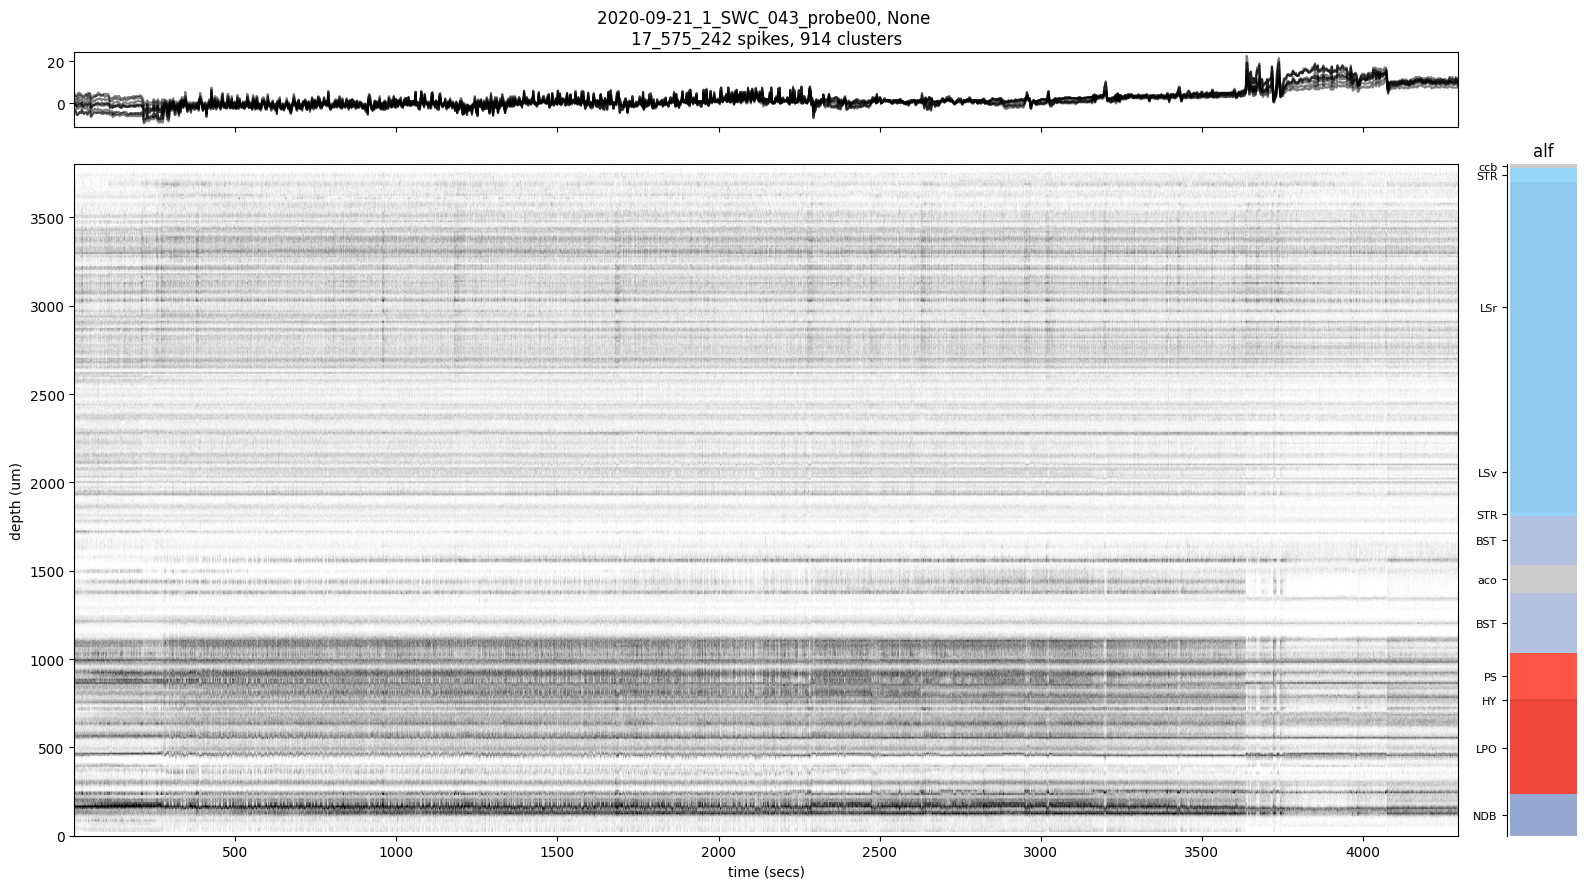

In [ ]:
sl.raster(spikes, channels)